In [59]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/8_OUTLIER_HANDLING_catcols.csv")
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1
0,0,100002,1,0,1,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8
1,1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5,8
4,4,100007,0,0,1,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3


# PREVIOUSLY HANDLED CATEGORICAL COLUMNS

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE1', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE']

In [108]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [109]:
previous_list=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE1', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

In [110]:
current_list=df.select_dtypes(include="number").columns.to_list()

In [111]:
set1 = set(previous_list)
set2 = set(current_list)

result1 = list(set1 - set2)
result2 = list(set2 - set1)
final_result = result1 + result2
len(final_result)

61

In [112]:
no_of_unique=[]
for i in df[final_result].columns:
  no_of_unique.append(df[i].nunique())

set(no_of_unique)

{2,
 3,
 6,
 7,
 10,
 11,
 12,
 14,
 15,
 17,
 24,
 27,
 33,
 36,
 67,
 81,
 1002,
 2210,
 5602,
 6168,
 11769,
 13669,
 15688,
 17460,
 44066,
 120454,
 271879,
 307292}

# unique values =**2**

In [113]:
cols_with2=df.columns[df.nunique() == 2].tolist()

In [114]:
len(cols_with2)

36

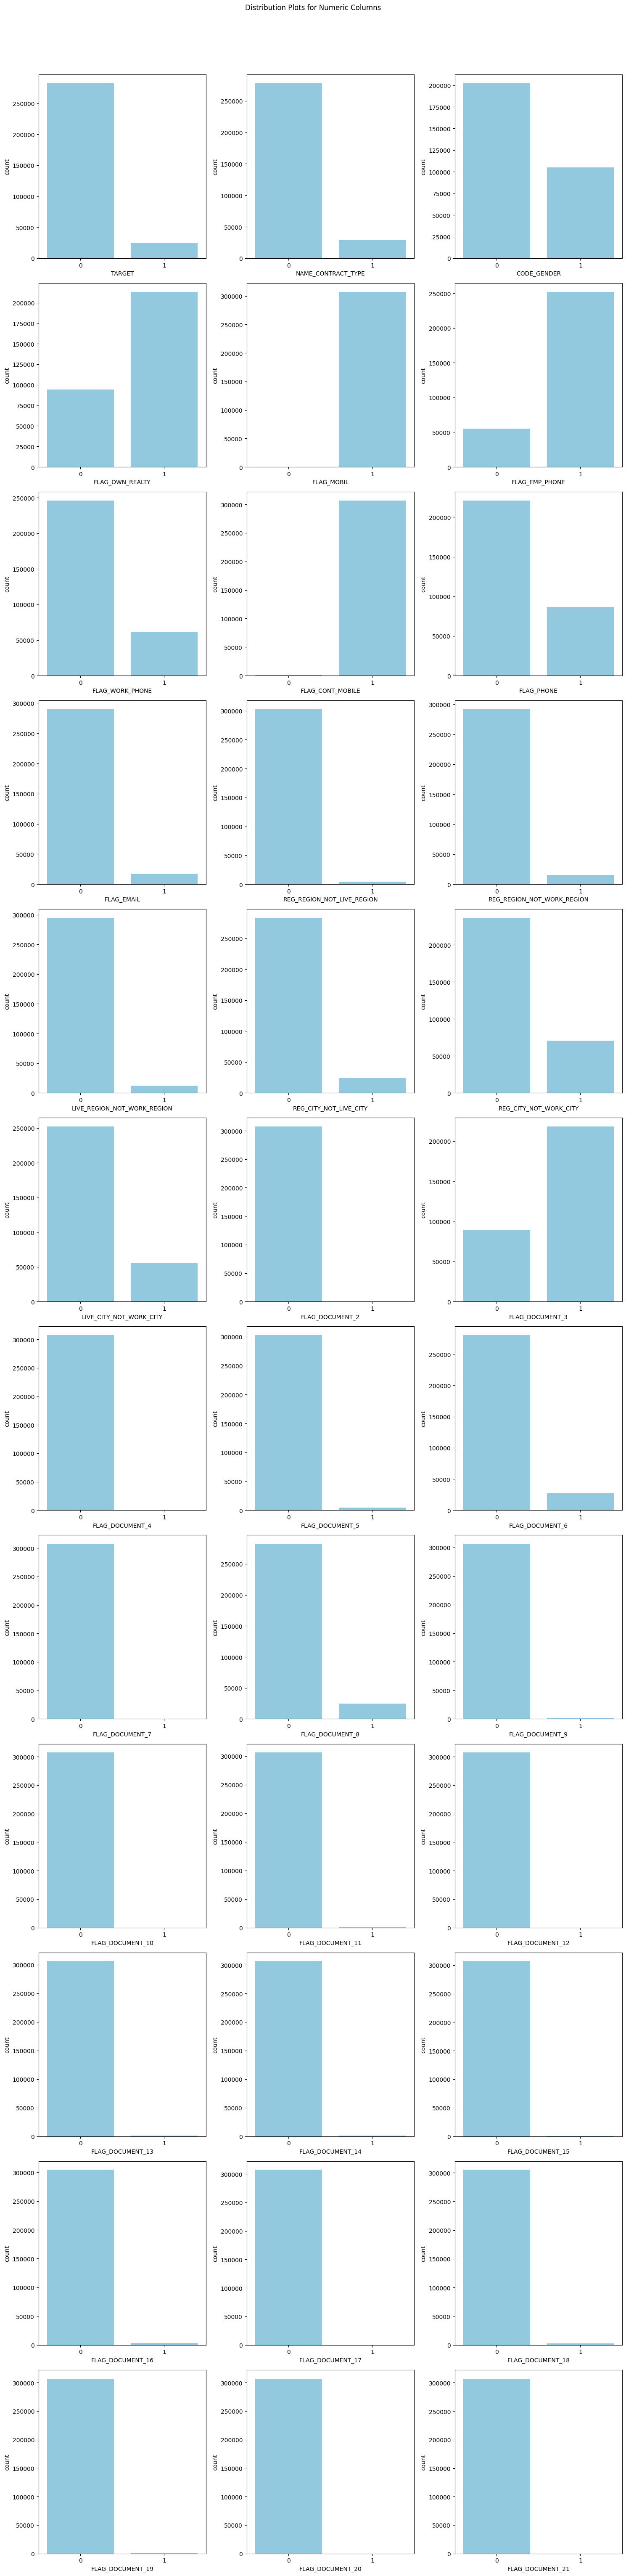

In [115]:
num_columns = df[cols_with2].shape[1]
num_rows = math.ceil(num_columns / 3)
num_cols = min(num_columns, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()
for i, column in enumerate(cols_with2):
    sns.countplot(data=df, x=column,ax=axes[i], color='skyblue')
plt.suptitle('Distribution Plots for Numeric Columns', y=1.02)
plt.tight_layout()
plt.show()

In [116]:
counts_per_column = df[cols_with2].apply(lambda x: x.value_counts()).T.astype(int)

# Display the counts
print("Counts of 1s and 0s in each binary column:")
counts_per_column

Counts of 1s and 0s in each binary column:


,0,1
TARGET,282480,24812
NAME_CONTRACT_TYPE,278054,29238
CODE_GENDER,202321,104971
FLAG_OWN_REALTY,94132,213160
FLAG_MOBIL,1,307291
FLAG_EMP_PHONE,55337,251955
FLAG_WORK_PHONE,246015,61277
FLAG_CONT_MOBILE,573,306719
FLAG_PHONE,220922,86370
FLAG_EMAIL,289879,17413


In [117]:
counts_per_column = (df[cols_with2].apply(lambda x: x.value_counts()).T.astype(int))*100/df.shape[0]

# Display the counts
print("Counts of 1s and 0s in each binary column:")
print(counts_per_column)

Counts of 1s and 0s in each binary column:
                                     0          1
TARGET                       91.925595   8.074405
NAME_CONTRACT_TYPE           90.485271   9.514729
CODE_GENDER                  65.839983  34.160017
FLAG_OWN_REALTY              30.632753  69.367247
FLAG_MOBIL                    0.000325  99.999675
FLAG_EMP_PHONE               18.007953  81.992047
FLAG_WORK_PHONE              80.059032  19.940968
FLAG_CONT_MOBILE              0.186468  99.813532
FLAG_PHONE                   71.893183  28.106817
FLAG_EMAIL                   94.333403   5.666597
REG_REGION_NOT_LIVE_REGION   98.488408   1.511592
REG_REGION_NOT_WORK_REGION   94.924697   5.075303
LIVE_REGION_NOT_WORK_REGION  95.933835   4.066165
REG_CITY_NOT_LIVE_CITY       92.183656   7.816344
REG_CITY_NOT_WORK_CITY       76.947659  23.052341
LIVE_CITY_NOT_WORK_CITY      82.038582  17.961418
FLAG_DOCUMENT_2              99.995769   0.004231
FLAG_DOCUMENT_3              28.984158  71.015842
FLAG_DO

DROPPING COLUMNS BASED ON THE IMBALANCE

In [118]:
columns_to_drop = [
    "FLAG_MOBIL", "FLAG_CONT_MOBILE","REG_REGION_NOT_LIVE_REGION","LIVE_REGION_NOT_WORK_REGION","FLAG_DOCUMENT_2","FLAG_DOCUMENT_4" ,"FLAG_DOCUMENT_5","FLAG_DOCUMENT_7","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10" ,
'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','TARGET']

df[columns_to_drop].corr()["TARGET"]

FLAG_MOBIL                     0.000535
FLAG_CONT_MOBILE               0.000351
REG_REGION_NOT_LIVE_REGION     0.005575
LIVE_REGION_NOT_WORK_REGION    0.002849
FLAG_DOCUMENT_2                0.005418
FLAG_DOCUMENT_4               -0.002673
FLAG_DOCUMENT_5               -0.000291
FLAG_DOCUMENT_7               -0.001347
FLAG_DOCUMENT_9               -0.004302
FLAG_DOCUMENT_10              -0.001415
FLAG_DOCUMENT_11              -0.004234
FLAG_DOCUMENT_12              -0.000756
FLAG_DOCUMENT_13              -0.011579
FLAG_DOCUMENT_14              -0.009444
FLAG_DOCUMENT_15              -0.006520
FLAG_DOCUMENT_16              -0.011623
FLAG_DOCUMENT_17              -0.003379
FLAG_DOCUMENT_18              -0.007941
FLAG_DOCUMENT_19              -0.001359
FLAG_DOCUMENT_20               0.000214
FLAG_DOCUMENT_21               0.003709
TARGET                         1.000000
Name: TARGET, dtype: float64

In [119]:
# Drop the specified columns by setting axis=1
df_dropped = df.drop(columns=columns_to_drop, axis=1)
df_dropped

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1
0,100002,0,1,1,0,202500.0,406597.5,24700.5,351000.0,6,...,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.5,8
4,100007,0,1,1,0,121500.0,513000.0,21865.5,513000.0,6,...,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307287,456251,0,1,0,0,157500.0,254700.0,27558.0,225000.0,6,...,0,0,1,0.5,0.0,0.0,0.0,0.0,2.5,14
307288,456252,0,0,1,0,72000.0,269550.0,12001.5,225000.0,6,...,1,0,0,0.0,0.0,0.0,0.0,1.0,2.5,1
307289,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,6,...,1,0,0,1.0,0.0,0.0,1.0,0.0,1.0,10
307290,456254,0,0,1,0,171000.0,370107.0,20205.0,319500.0,6,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,8


# unique values =3

In [120]:
cols_with3=df.columns[df.nunique() == 3].tolist()
cols_with3

['NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

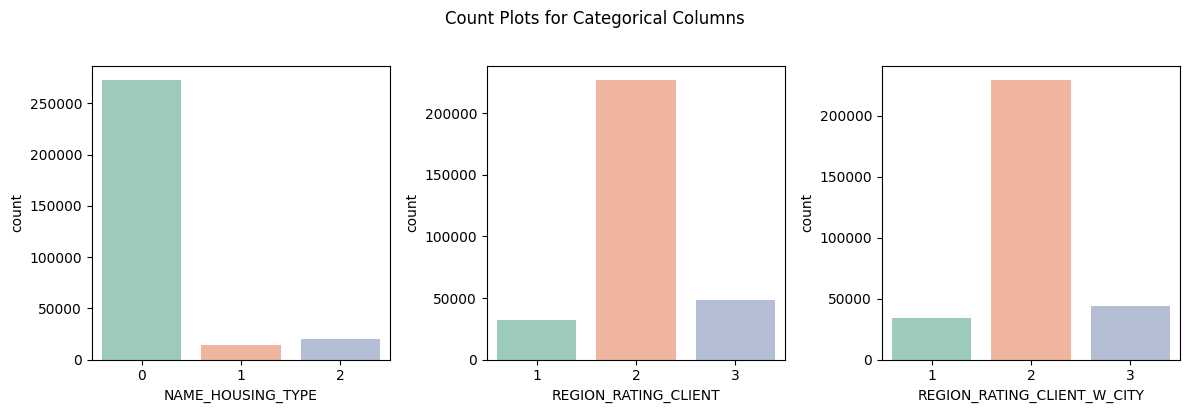

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot countplots for each categorical column
for i, column in enumerate(df[cols_with3].columns):
    sns.countplot(x=column, data=df, palette='Set2', ax=axes[i], alpha=0.7)

# Set common title
plt.suptitle('Count Plots for Categorical Columns', y=1.02)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# unique values = 4

In [122]:
cols_with3=df.columns[df.nunique() == 4].tolist()
cols_with3

['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']

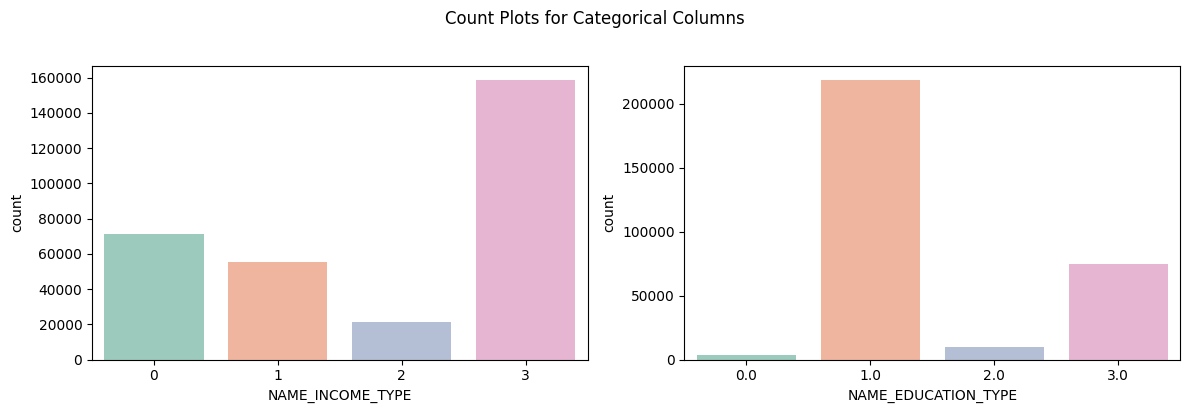

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot countplots for each categorical column
for i, column in enumerate(df[cols_with3].columns):
    sns.countplot(x=column, data=df, palette='Set2', ax=axes[i], alpha=0.7)

# Set common title
plt.suptitle('Count Plots for Categorical Columns', y=1.02)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [124]:
df['NAME_EDUCATION_TYPE'].value_counts()

1.0    218365
3.0     74838
2.0     10273
0.0      3816
Name: NAME_EDUCATION_TYPE, dtype: int64

In [125]:
df['NAME_EDUCATION_TYPE']=df['NAME_EDUCATION_TYPE'].replace(0,1)

# unique values = 7

In [126]:
cols_with3=df.columns[df.nunique() == 7].tolist()
cols_with3

['NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START']

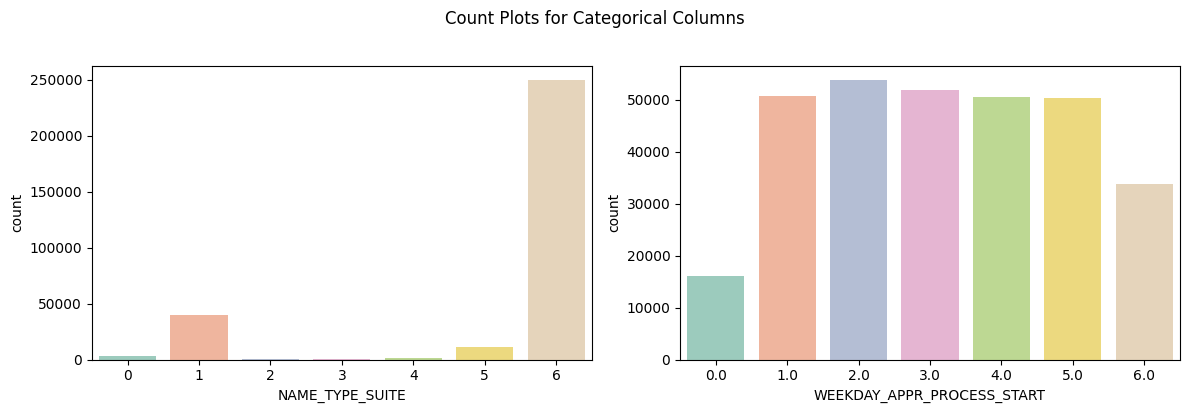

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot countplots for each categorical column
for i, column in enumerate(df[cols_with3].columns):
    sns.countplot(x=column, data=df, palette='Set2', ax=axes[i], alpha=0.7)

# Set common title
plt.suptitle('Count Plots for Categorical Columns', y=1.02)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [128]:
df['NAME_TYPE_SUITE'].value_counts()

6    249578
1     40168
5     11372
0      3268
4      1770
3       865
2       271
Name: NAME_TYPE_SUITE, dtype: int64

In [129]:
values_to_replace=[0,2,3,4]
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].replace(values_to_replace,5)

# unique = 10

In [130]:
cols_with3=df.columns[df.nunique() == 10].tolist()
cols_with3

['DEF_30_CNT_SOCIAL_CIRCLE']

df

In [131]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0     272149
1      28310
2       5319
3       1191
4        253
5         56
6         11
7          1
34         1
8          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

<Axes: xlabel='DEF_30_CNT_SOCIAL_CIRCLE', ylabel='count'>

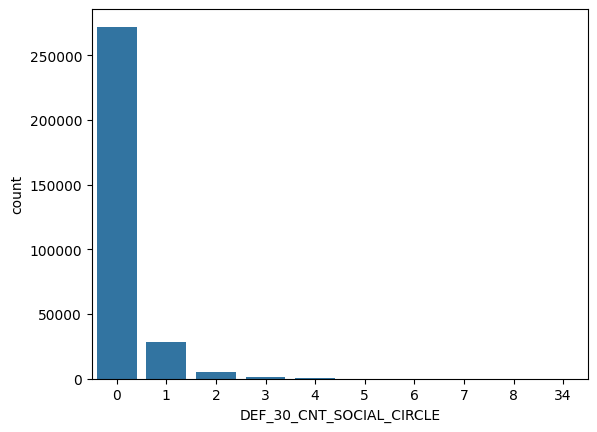

In [132]:
sns.countplot(x=df["DEF_30_CNT_SOCIAL_CIRCLE"])

In [133]:
values_to_replace=[4,5,6,7,8,34,3]
df['DEF_30_CNT_SOCIAL_CIRCLE']=df['DEF_30_CNT_SOCIAL_CIRCLE'].replace(values_to_replace,2)

# CAPPING FUNCTION (USED FOR BASE MODEL ONLY)

In [134]:

def cap_outliers_iqr(series, multiplier=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr

    # Cap values outside the range
    capped_values = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_values

# UNIQUE = 11 to 81

In [135]:
selected_columns = [column for column in df.columns if 11 <= df[column].nunique() <= 81]

# Display the selected column names
print("Column names with unique values between 11 and 81:")
print(selected_columns)

Column names with unique values between 11 and 81:
['CNT_CHILDREN', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OCCUPATION_TYPE1']


##<ul>1.'CNT_CHILDREN'

<Axes: xlabel='CNT_CHILDREN'>

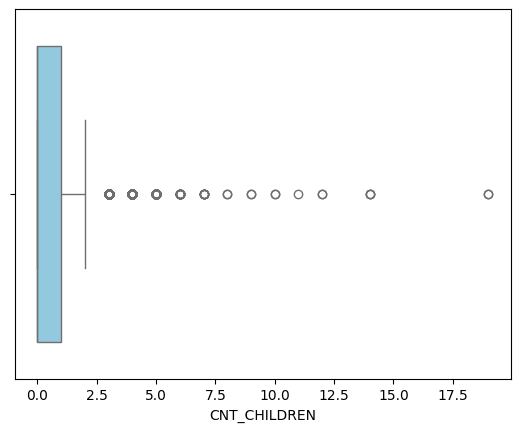

In [137]:
sns.boxplot(x=df['CNT_CHILDREN'],color='skyblue')

<Axes: ylabel='Density'>

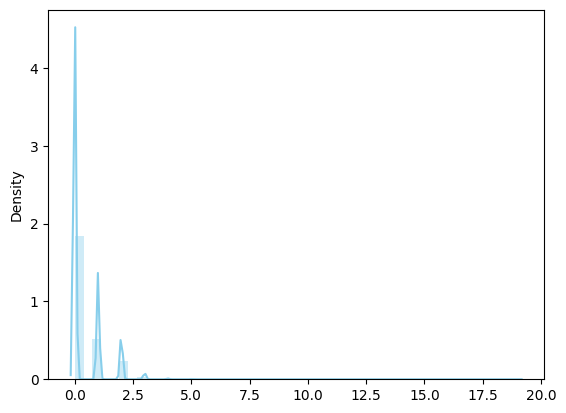

In [138]:
sns.distplot(x=df['CNT_CHILDREN'],color='skyblue')

In [139]:
df['CNT_CHILDREN'].max()

19

In [140]:
df['CNT_CHILDREN'].min()

0

In [141]:
df['CNT_CHILDREN'].value_counts()

0     215210
1      61082
2      26731
3       3715
4        429
5         83
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

more than 2 I have converted into a single column

In [142]:
df.loc[df['CNT_CHILDREN']>3,'CNT_CHILDREN']=3

In [143]:
df['CNT_CHILDREN'].value_counts()

0    215210
1     61082
2     26731
3      4269
Name: CNT_CHILDREN, dtype: int64

<Axes: xlabel='CNT_CHILDREN', ylabel='count'>

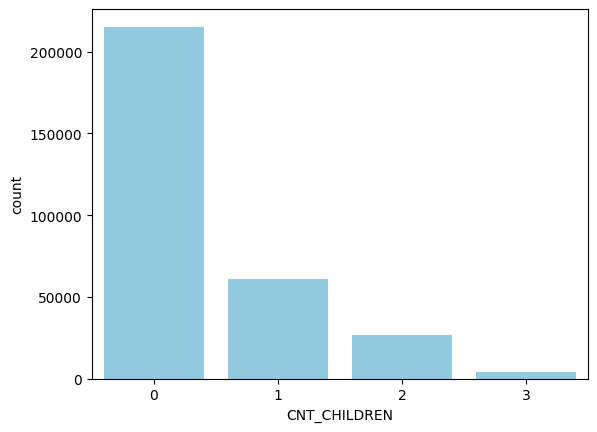

In [144]:
sns.countplot(x=df['CNT_CHILDREN'],color="skyblue")

Here 3 indicates 3 or more cases

##   <ul> 2.'REGION_POPULATION_RELATIVE'

## <ul>3.'OWN_CAR_AGE'

<Axes: xlabel='OWN_CAR_AGE'>

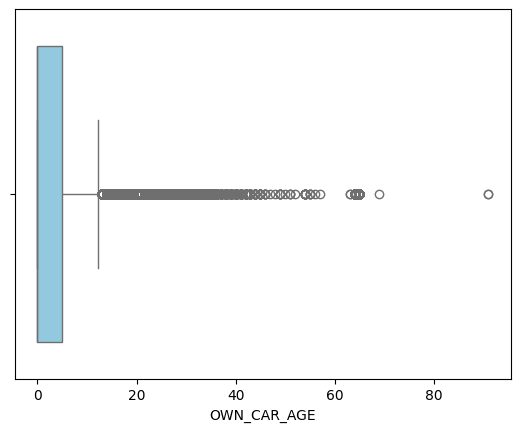

In [145]:
sns.boxplot(x=df["OWN_CAR_AGE"],color="skyblue")

In [146]:
df[df["OWN_CAR_AGE"]>20].shape[0]

# out of 3 lakh applicants 13049 people are using cars whose age is more 20

13049

In [147]:
df[df["OWN_CAR_AGE"]>30].shape[0]


4931

In [148]:
df[df["OWN_CAR_AGE"]>40].shape[0]

3525

In [149]:
df[df["OWN_CAR_AGE"]>55].shape[0]

3340

In [150]:
df["OWN_CAR_AGE"].max()

91.0

In [151]:
df[df["OWN_CAR_AGE"]==df["OWN_CAR_AGE"].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1
271548,415025,1,0,1,1,1,180000.0,675000.0,34465.5,675000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,4
293920,440757,0,1,1,0,1,112500.0,180000.0,9000.0,180000.0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0,4


In [152]:
# dropping only extreme outliers only
df=df.loc[df["OWN_CAR_AGE"]<55]

In [153]:
df.shape

(303948, 71)

<Axes: xlabel='OWN_CAR_AGE'>

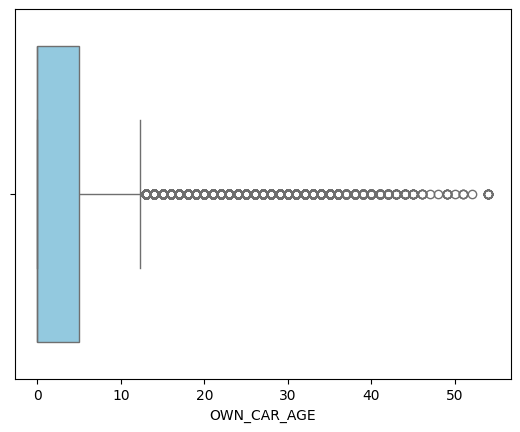

In [154]:
sns.boxplot(x=df["OWN_CAR_AGE"],color="skyblue")

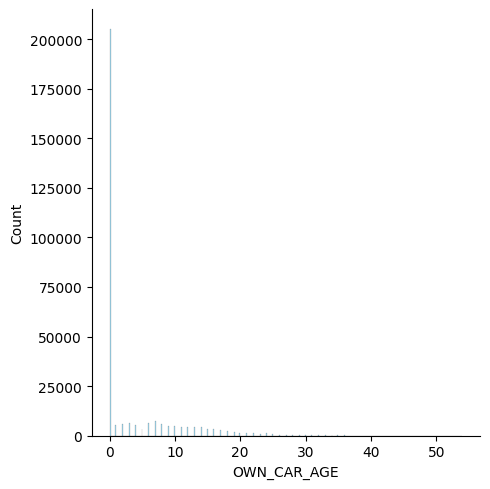

In [155]:
sns.displot(x=df["OWN_CAR_AGE"],color="skyblue")

## <ul>4. 'CNT_FAM_MEMBERS'

<Axes: xlabel='CNT_FAM_MEMBERS'>

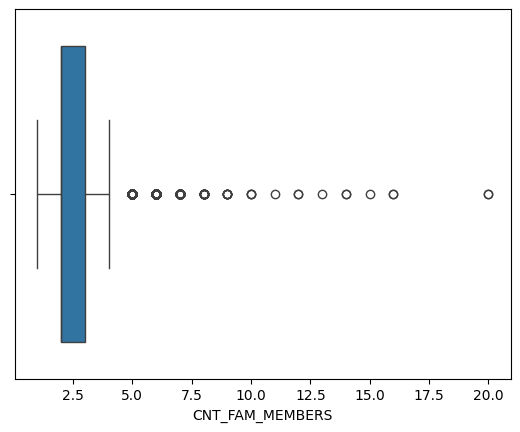

In [156]:
sns.boxplot(x=df['CNT_FAM_MEMBERS'])



In [157]:
df[df['CNT_FAM_MEMBERS']>df['CNT_FAM_MEMBERS'].quantile(0.75)].shape[0]

28295

In [158]:
df[df['CNT_FAM_MEMBERS']>5].shape[0]

524

In [159]:
df[df['CNT_FAM_MEMBERS']>6].shape[0]

120

# <ul>5.'HOUR_APPR_PROCESS_START'

<Axes: xlabel='HOUR_APPR_PROCESS_START'>

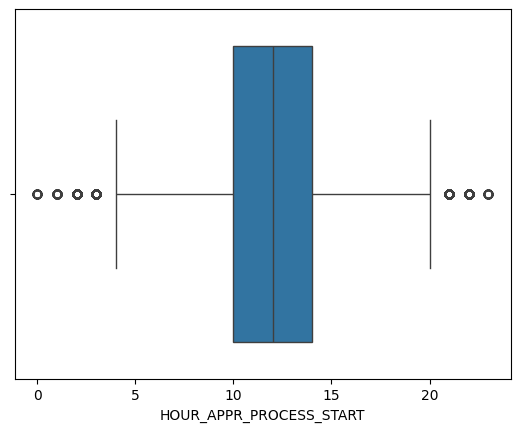

In [161]:
sns.boxplot(x=df['HOUR_APPR_PROCESS_START'])

In [164]:
df[df['HOUR_APPR_PROCESS_START']>df['HOUR_APPR_PROCESS_START'].quantile(1)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1


In [166]:
df[df['HOUR_APPR_PROCESS_START']<df['HOUR_APPR_PROCESS_START'].quantile(0)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1


NO EXTREME OUTLIERS

# <ul>6. 'OBS_30_CNT_SOCIAL_CIRCLE'

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE'>

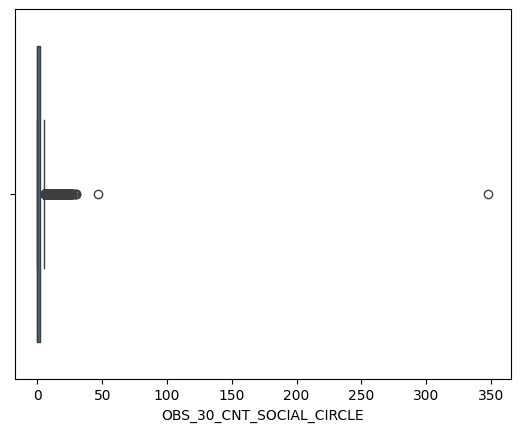

In [169]:
sns.boxplot(x=df["OBS_30_CNT_SOCIAL_CIRCLE"])

In [172]:
df[df["OBS_30_CNT_SOCIAL_CIRCLE"]==df["OBS_30_CNT_SOCIAL_CIRCLE"].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1
147801,271494,0,0,0,0,0,85500.0,688500.0,20128.5,688500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.5,8


only one row- dropping the extreme outlier

In [177]:
df=df.loc[df["OBS_30_CNT_SOCIAL_CIRCLE"]!=df["OBS_30_CNT_SOCIAL_CIRCLE"].max()]

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE'>

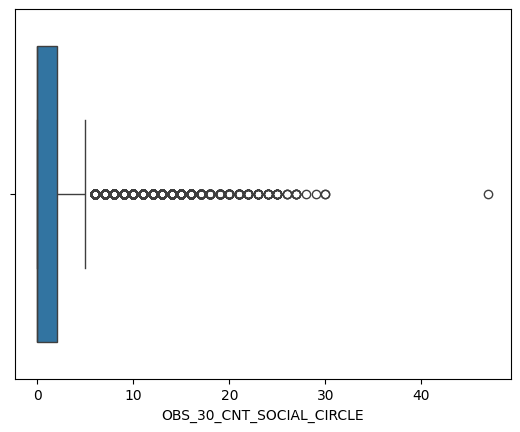

In [178]:
sns.boxplot(x=df["OBS_30_CNT_SOCIAL_CIRCLE"])

In [179]:
df["OBS_30_CNT_SOCIAL_CIRCLE"].quantile(1)

47.0

In [180]:
df.loc[df["OBS_30_CNT_SOCIAL_CIRCLE"]>df["OBS_30_CNT_SOCIAL_CIRCLE"].quantile(1)]

# no extreme outliers

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1


# <ul> 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', "AMT_REQ_CREDIT_BUREAU_WEEK",'AMT_REQ_CREDIT_BUREAU_DAY'

In [ ]:
selected_columns=['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

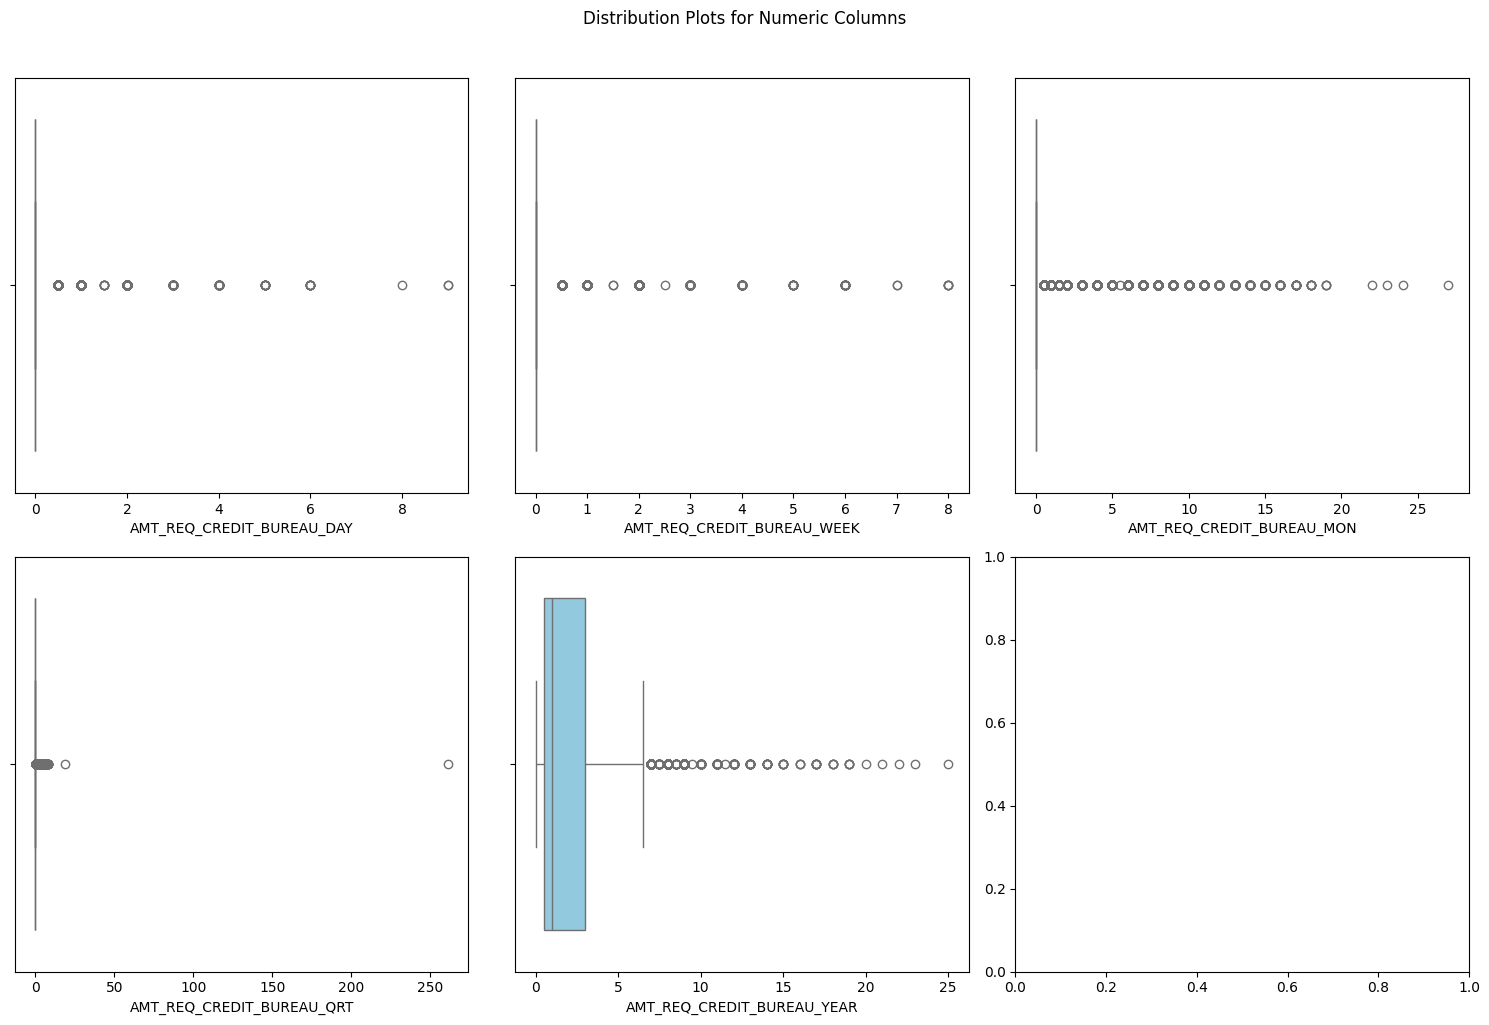

In [ ]:
import math
num_columns = df[selected_columns].shape[1]
num_rows = math.ceil(len(selected_columns)/ 3)
num_cols = min(num_columns, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()
for i, column in enumerate(selected_columns):
    sns.boxplot(data=df, x=column,ax=axes[i], color='skyblue')
plt.suptitle('Distribution Plots for Numeric Columns', y=1.02)
plt.tight_layout()
plt.show()

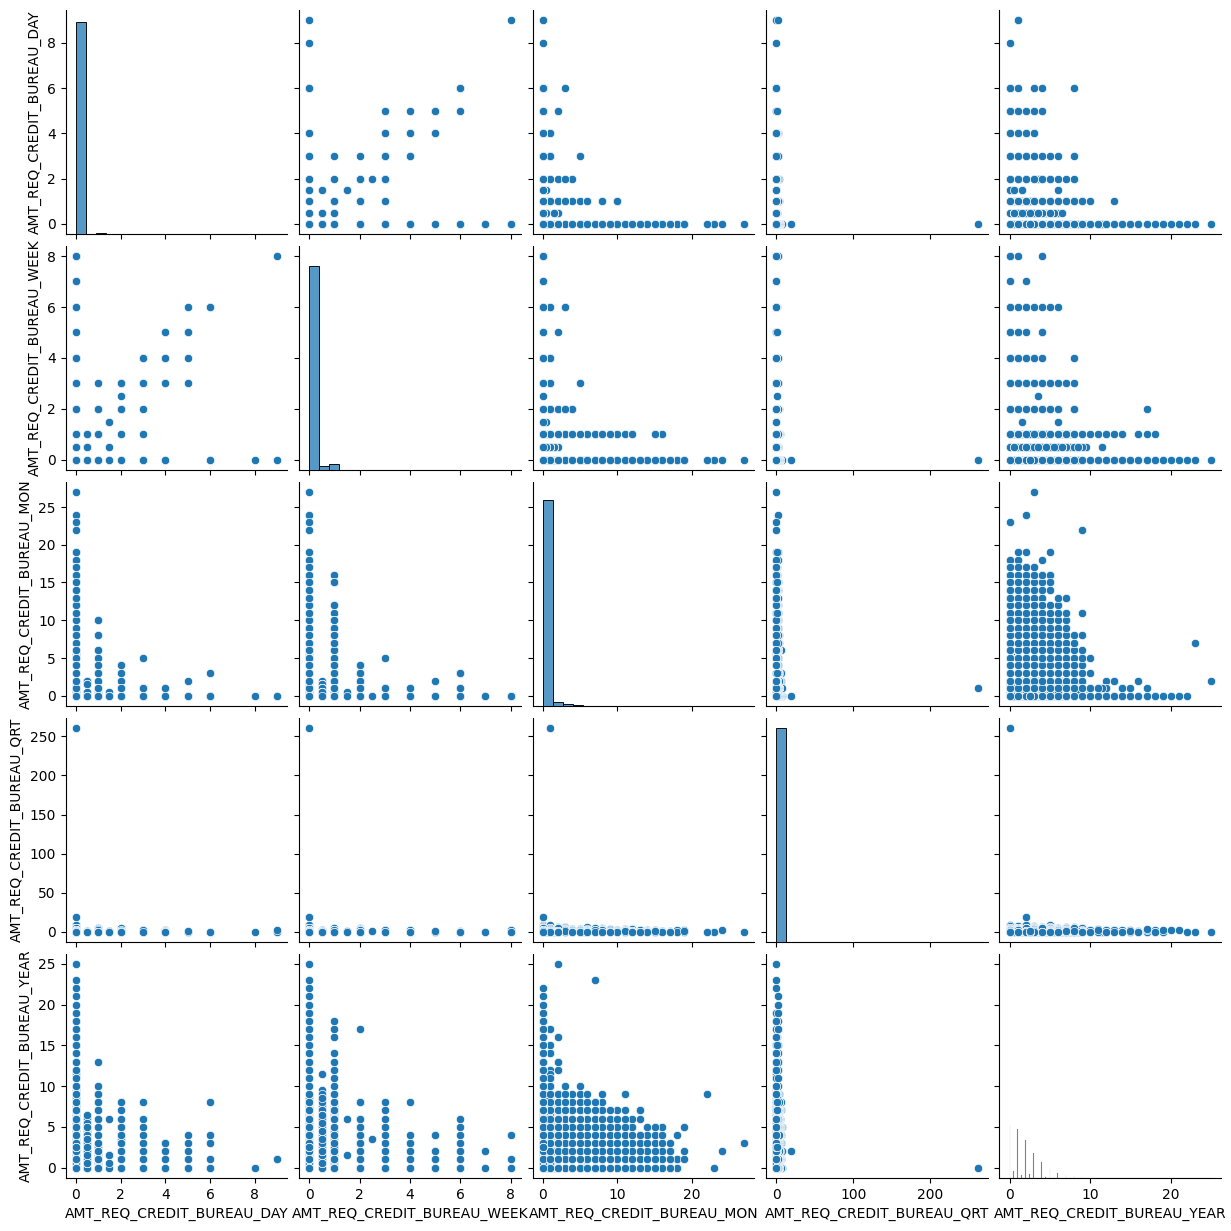

In [ ]:
sns.pairplot(df[selected_columns])

In [199]:
df[selected_columns].corr()

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_REQ_CREDIT_BUREAU_DAY,1.000000,0.202879,-0.005293,-0.005038,-0.002687
AMT_REQ_CREDIT_BUREAU_WEEK,0.202879,1.000000,-0.014369,-0.019831,0.018014
AMT_REQ_CREDIT_BUREAU_MON,-0.005293,-0.014369,1.000000,-0.005983,0.004711
AMT_REQ_CREDIT_BUREAU_QRT,-0.005038,-0.019831,-0.005983,1.000000,0.083885
AMT_REQ_CREDIT_BUREAU_YEAR,-0.002687,0.018014,0.004711,0.083885,1.000000


In [200]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Function to calculate VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data


vif_result = calculate_vif(df[selected_columns])

print("VIF Results:")
print(vif_result)

VIF Results:
                     Variable       VIF
0   AMT_REQ_CREDIT_BUREAU_DAY  1.046972
1  AMT_REQ_CREDIT_BUREAU_WEEK  1.068296
2   AMT_REQ_CREDIT_BUREAU_MON  1.043116
3   AMT_REQ_CREDIT_BUREAU_QRT  1.092118
4  AMT_REQ_CREDIT_BUREAU_YEAR  1.152102


no multicollinarity present

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_QRT'>

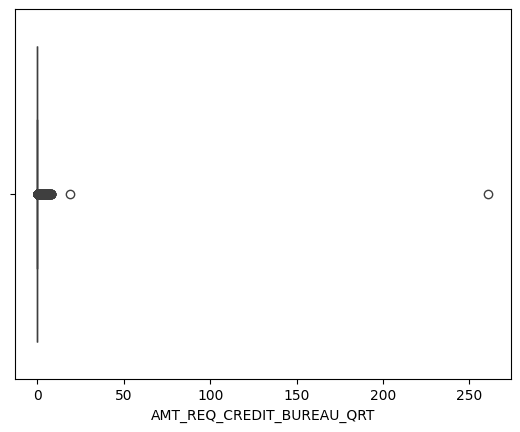

In [207]:
sns.boxplot(x=df["AMT_REQ_CREDIT_BUREAU_QRT"])

In [209]:
df.loc[df["AMT_REQ_CREDIT_BUREAU_QRT"]>df["AMT_REQ_CREDIT_BUREAU_QRT"].quantile(1)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1


no extreme outliers

# RANGE 1002- 307292

In [91]:
selected_columns = [column for column in df.columns if 1002 <= df[column].nunique() <= 307292]

# Display the selected column names
print("Column names with unique values between 11 and 81:")
print(selected_columns)

Column names with unique values between 11 and 81:
['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']


In [92]:
len(selected_columns)

12

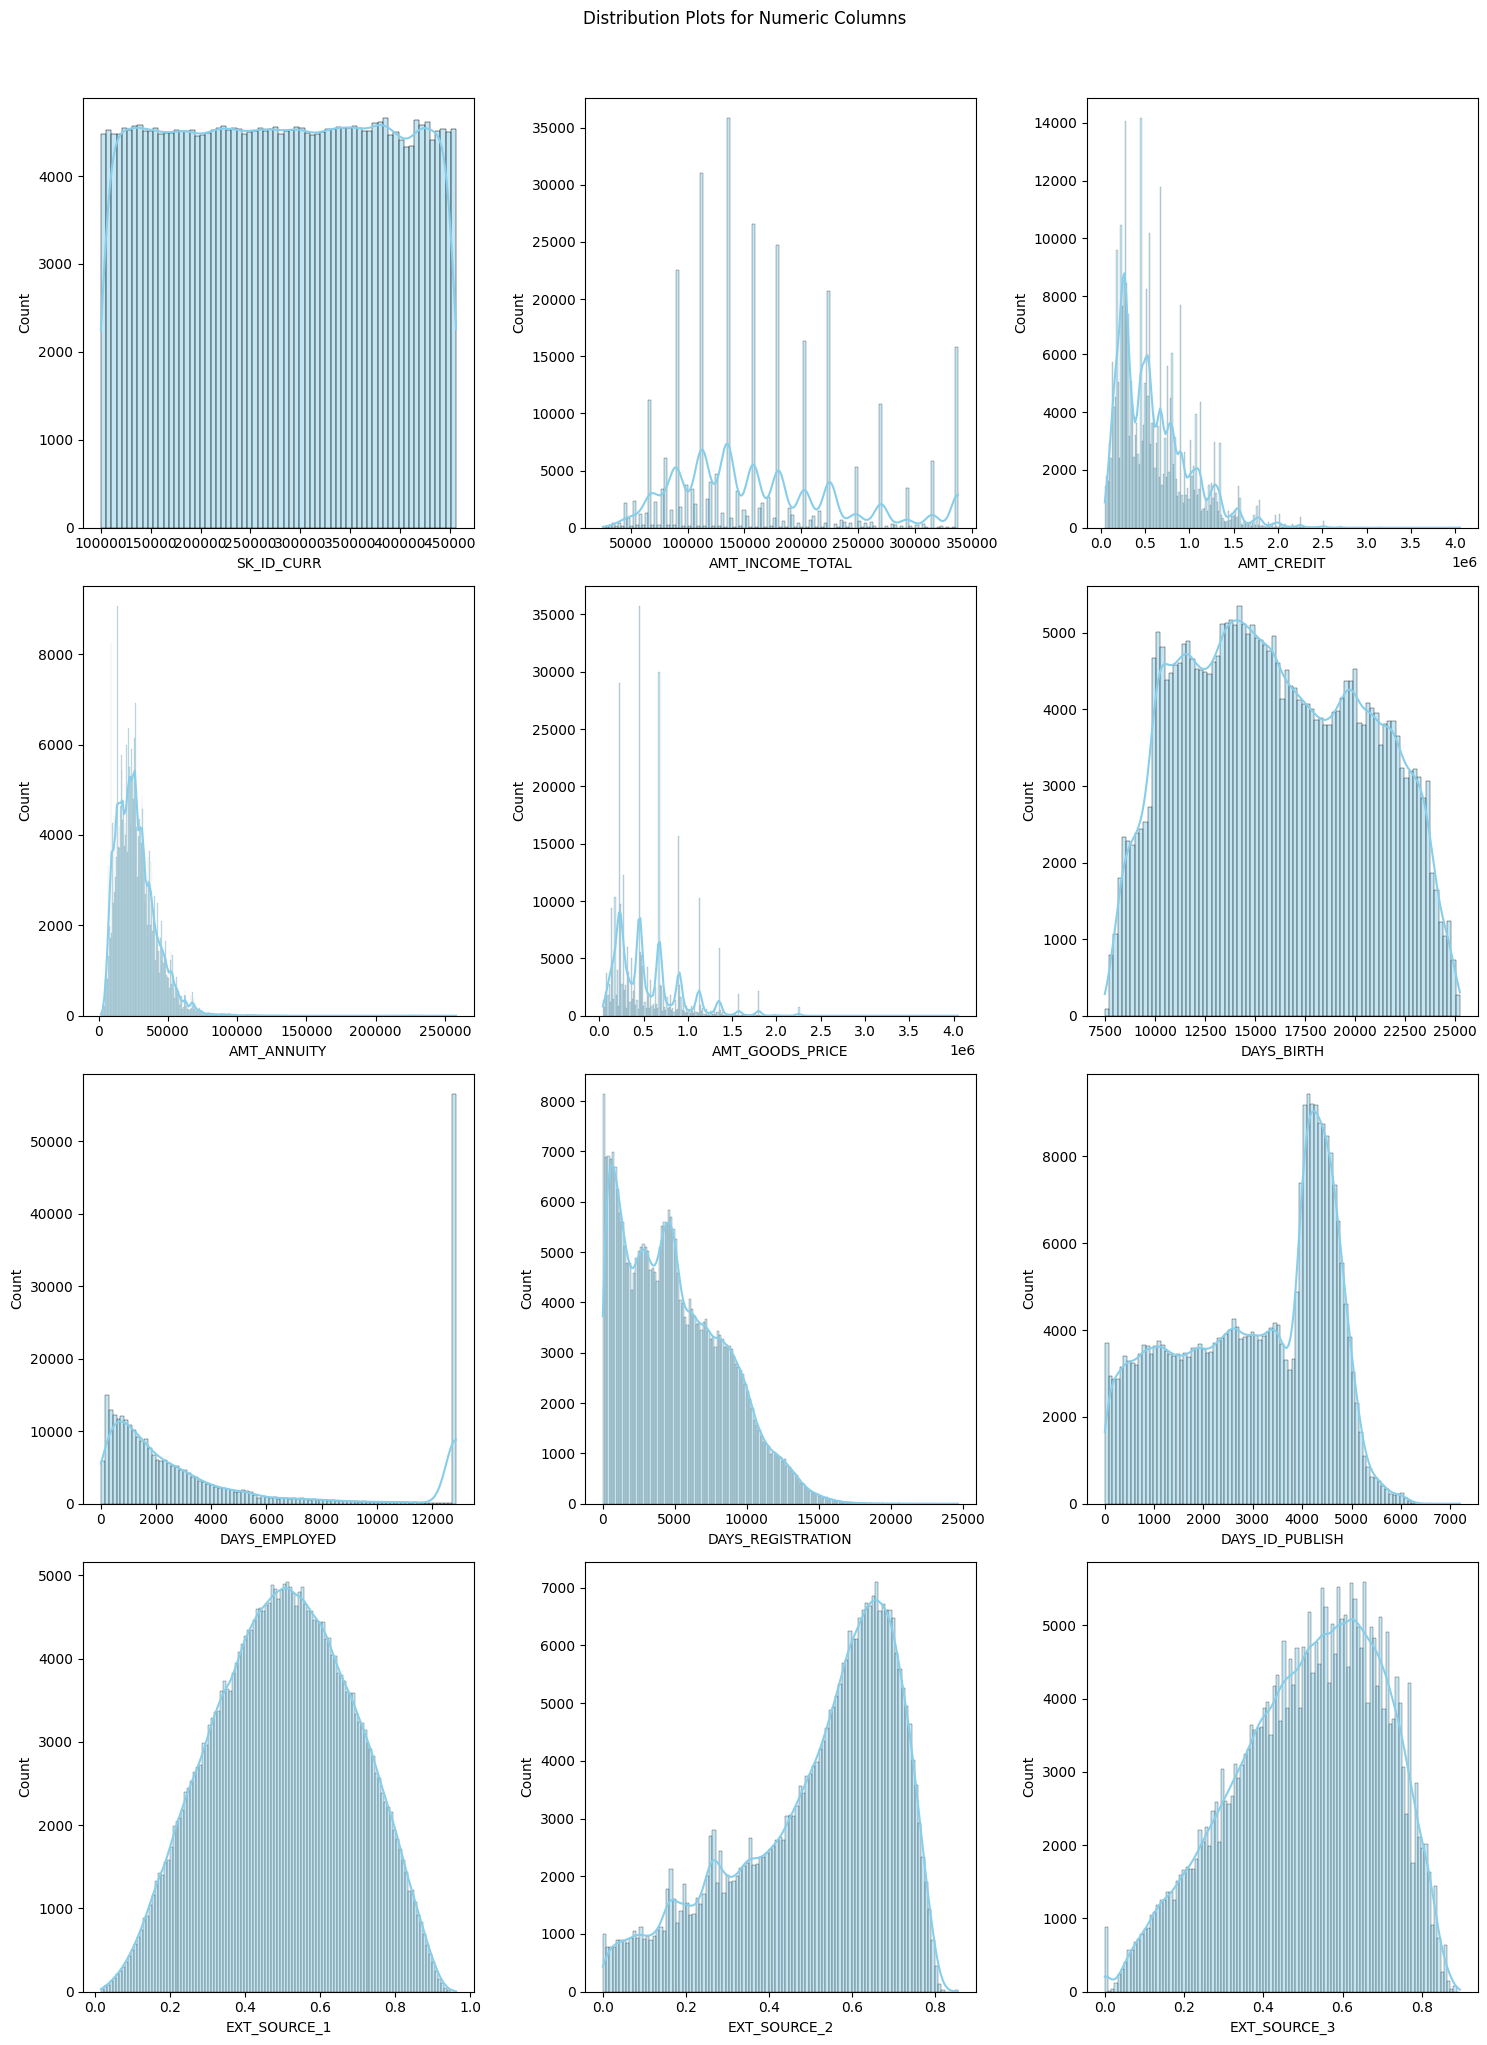

In [95]:
num_columns = df[selected_columns].shape[1]
num_rows = math.ceil(num_columns / 3)
num_cols = min(num_columns, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()
for i, column in enumerate(selected_columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i], color='skyblue')
plt.suptitle('Distribution Plots for Numeric Columns', y=1.02)
plt.tight_layout()
plt.show()

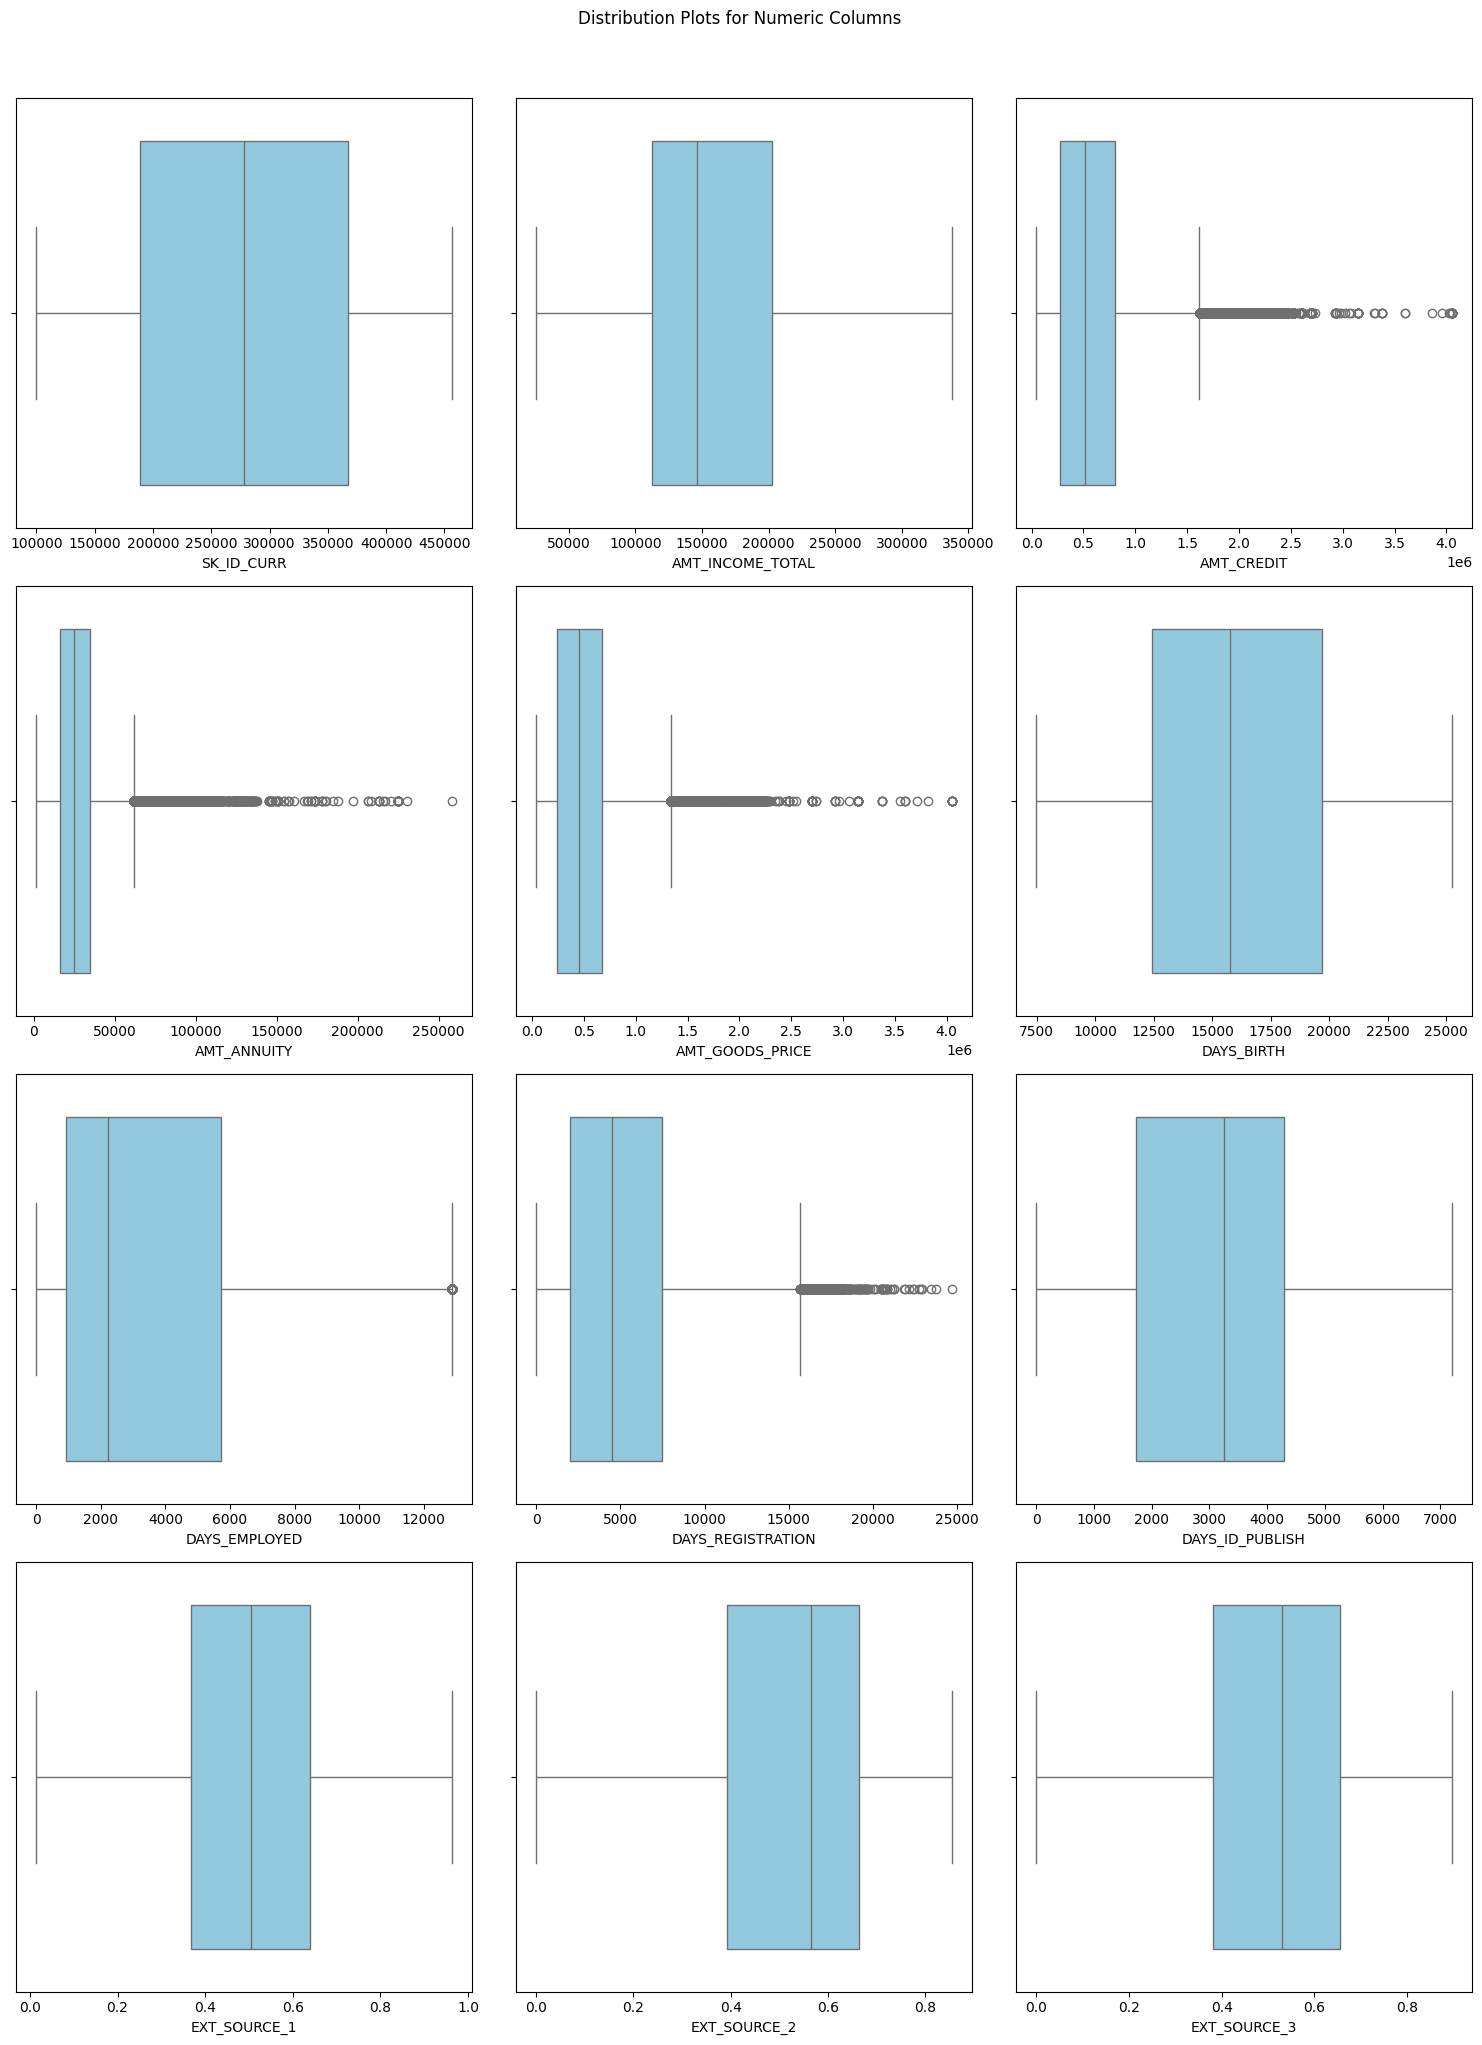

In [97]:
num_columns = df[selected_columns].shape[1]
num_rows = math.ceil(num_columns / 3)
num_cols = min(num_columns, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()
for i, column in enumerate(selected_columns):
    sns.boxplot(data=df, x=column, ax=axes[i], color='skyblue')
plt.suptitle('Distribution Plots for Numeric Columns', y=1.02)
plt.tight_layout()
plt.show()

Based on graph

* AMT_CREDIT - many outliers
* AMT_ANNUITY - Many outliers
* AMT_GOODS_PRICE- many outliers
* DAYS_EMPLOYED - 1 outlier
* DAYS_REGISTRATION - many outliers

In [211]:
df.loc[df["AMT_CREDIT"]>df["AMT_CREDIT"].quantile(1)]

# no extreme outliers

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1


<Axes: xlabel='DAYS_EMPLOYED'>

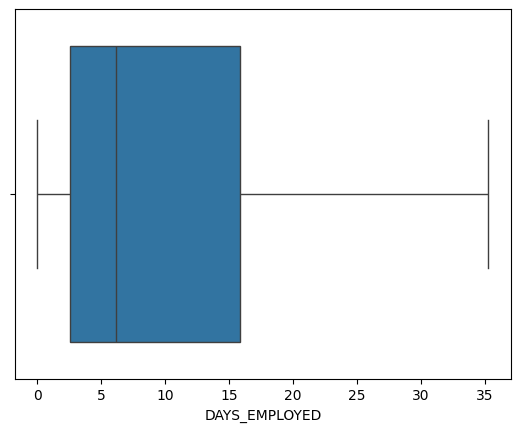

In [212]:
sns.boxplot(x=df["DAYS_EMPLOYED"]/365)

# no extreme outliers

In [214]:
df.loc[df["AMT_ANNUITY"]>df["AMT_ANNUITY"].quantile(1)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1


In [215]:
# DAYS_REGISTRATION
df.loc[df["DAYS_REGISTRATION"]>df["DAYS_REGISTRATION"].quantile(1)]

# no extreme outliers

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1


In [216]:
df.to_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/9_OUTLIER_HANDLING_numcols.csv")